# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# Loading The Data

In [2]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df.drop(columns = ['Id'], inplace = True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# EDA

In [3]:
#first 5 rows
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#shape of the data
df.shape

(150, 5)

In [5]:
#data types of the columns
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
#statistical information about the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [7]:
#check if there are any duplicated rows
df.duplicated().sum()

3

In [8]:
#number of nulls in each column
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
#check unbalance in target
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

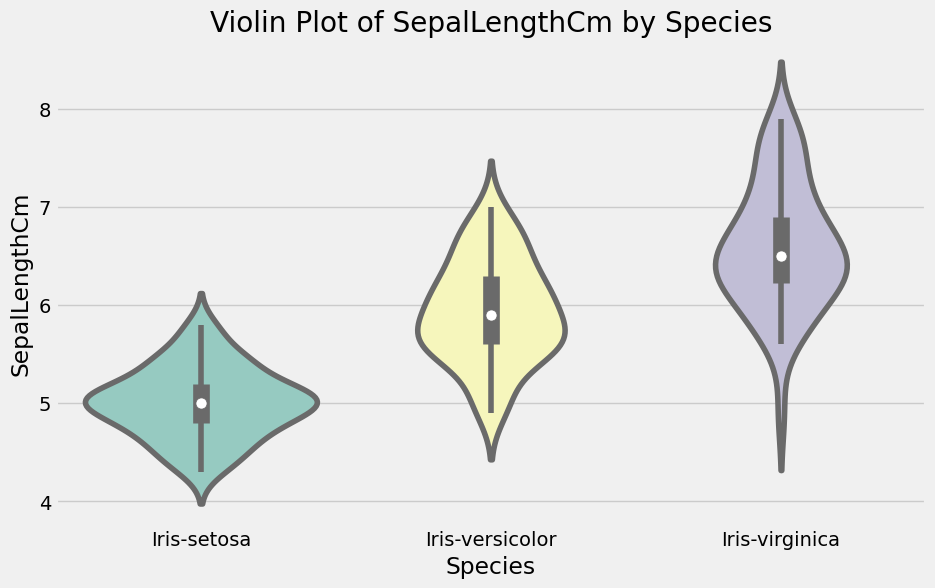

In [11]:
#violin plot of SepalLengthCm by Species
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = df, palette = 'Set3')
plt.title('Violin Plot of SepalLengthCm by Species')
plt.xlabel('Species')
plt.ylabel('SepalLengthCm')
plt.show()

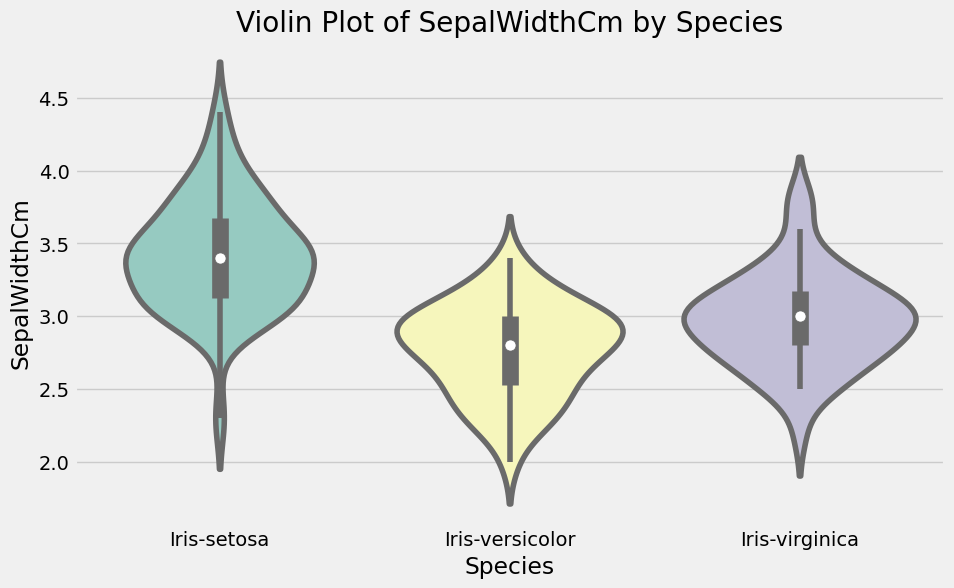

In [12]:
#violin plot of SepalWidthCm by Species
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = df, palette = 'Set3')
plt.title('Violin Plot of SepalWidthCm by Species')
plt.xlabel('Species')
plt.ylabel('SepalWidthCm')
plt.show()

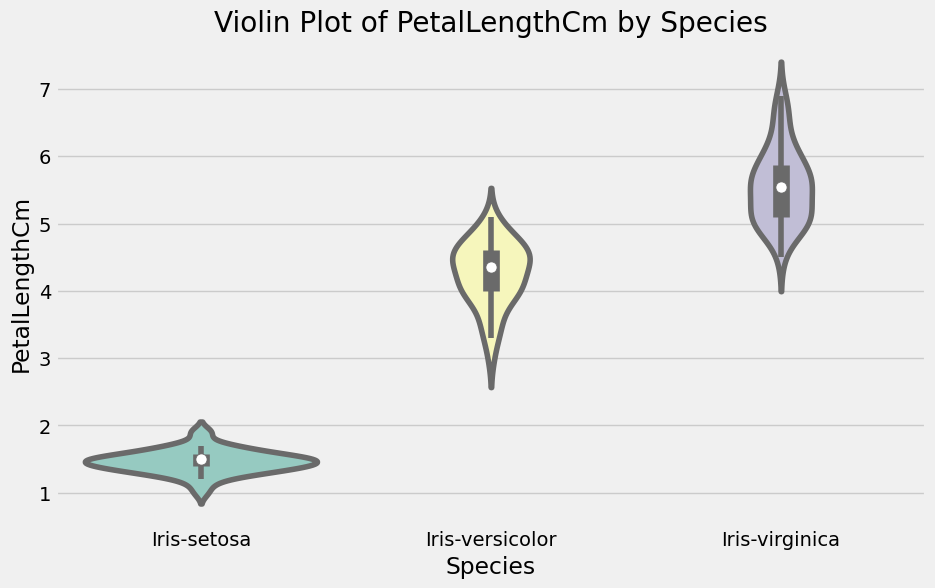

In [13]:
#violin plot of PetalLengthCm by Species
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = df, palette = 'Set3')
plt.title('Violin Plot of PetalLengthCm by Species')
plt.xlabel('Species')
plt.ylabel('PetalLengthCm')
plt.show()

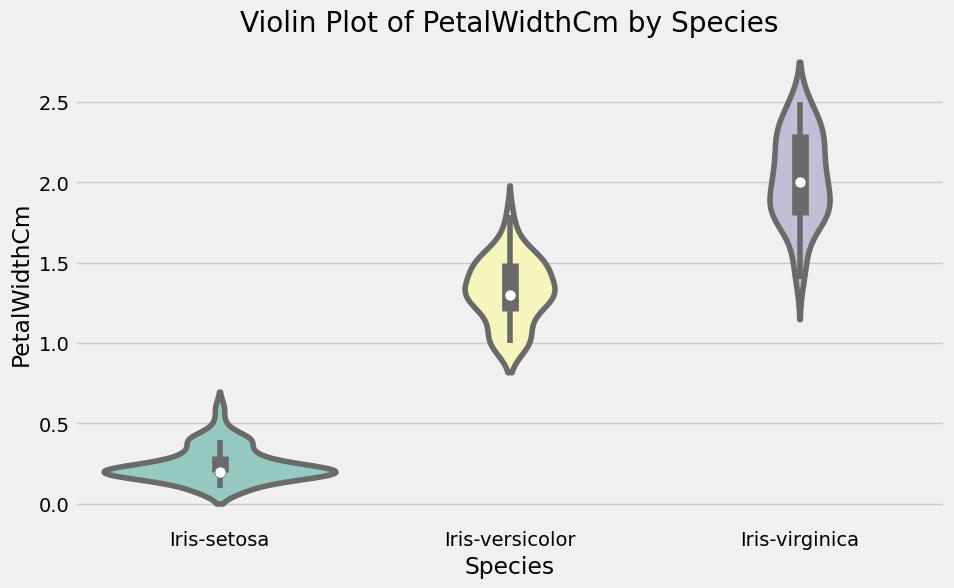

In [14]:
#violin plot of PetalWidthCm by Species
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = df, palette = 'Set3')
plt.title('Violin Plot of PetalWidthCm by Species')
plt.xlabel('Species')
plt.ylabel('PetalWidthCm')
plt.show()

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

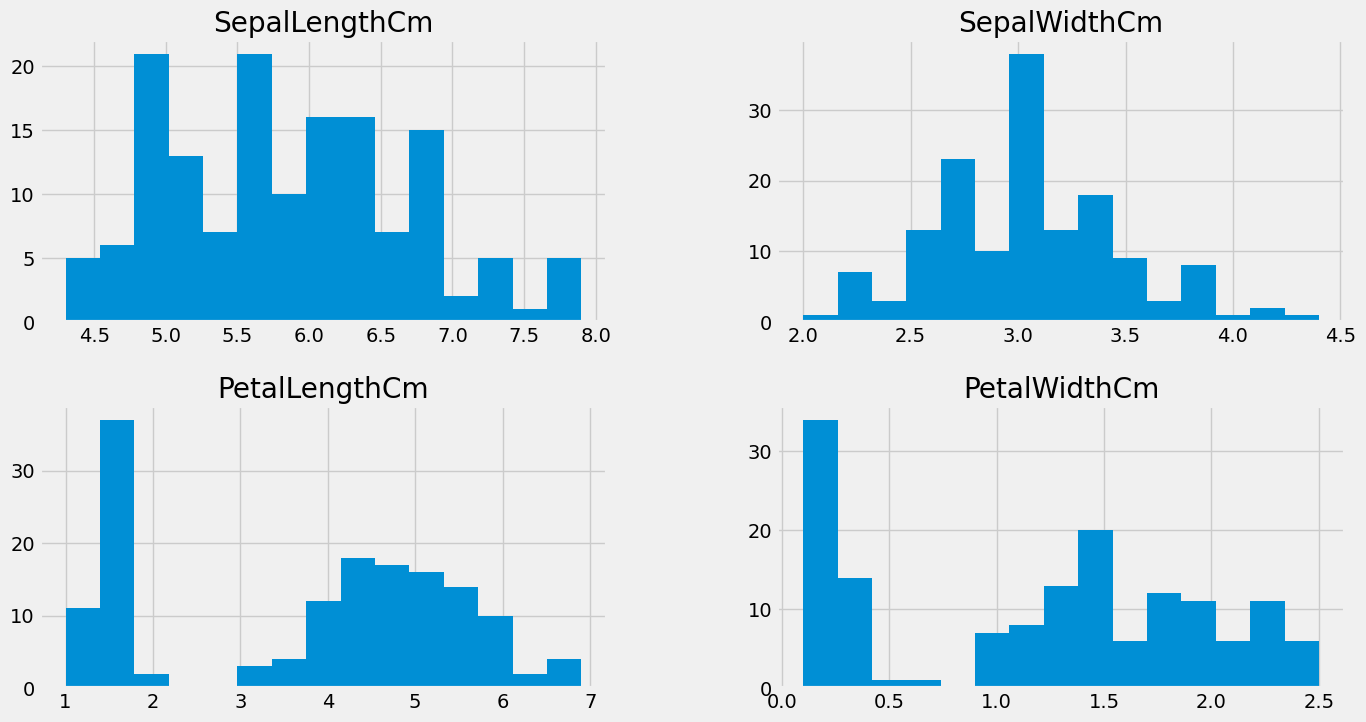

In [15]:
#histograms for all the columns
df.hist(bins = 15, figsize = (15, 8))

Text(38.33333333333333, 0.5, 'SepalLengthCm')

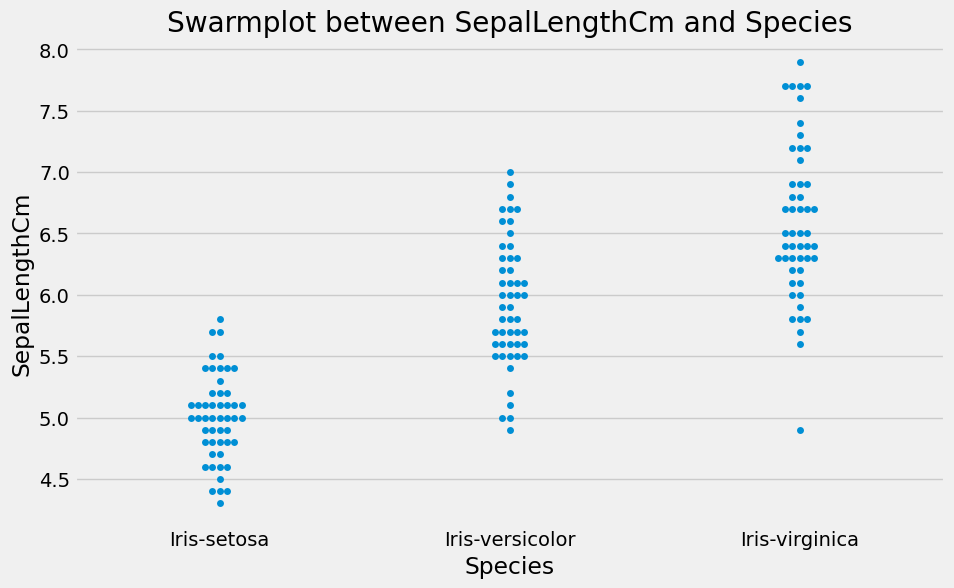

In [16]:
#create the swarm plot
plt.figure(figsize = (10, 6))
sns.swarmplot(x = 'Species', y = 'SepalLengthCm', data = df)

#add title and labels
plt.title('Swarmplot between SepalLengthCm and Species')
plt.xlabel('Species')
plt.ylabel('SepalLengthCm')

Text(38.45833333333333, 0.5, 'SepalWidthCm')

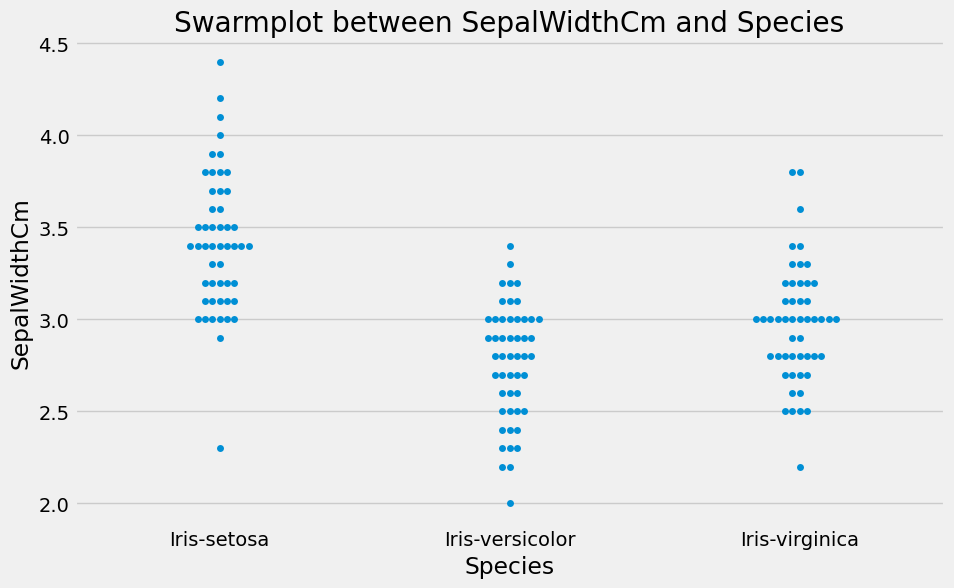

In [17]:
#create the swarm plot
plt.figure(figsize = (10, 6))
sns.swarmplot(x = 'Species', y = 'SepalWidthCm', data = df)

#add title and labels
plt.title('Swarmplot between SepalWidthCm and Species')
plt.xlabel('Species')
plt.ylabel('SepalWidthCm')

Text(57.08333333333333, 0.5, 'PetalLengthCm')

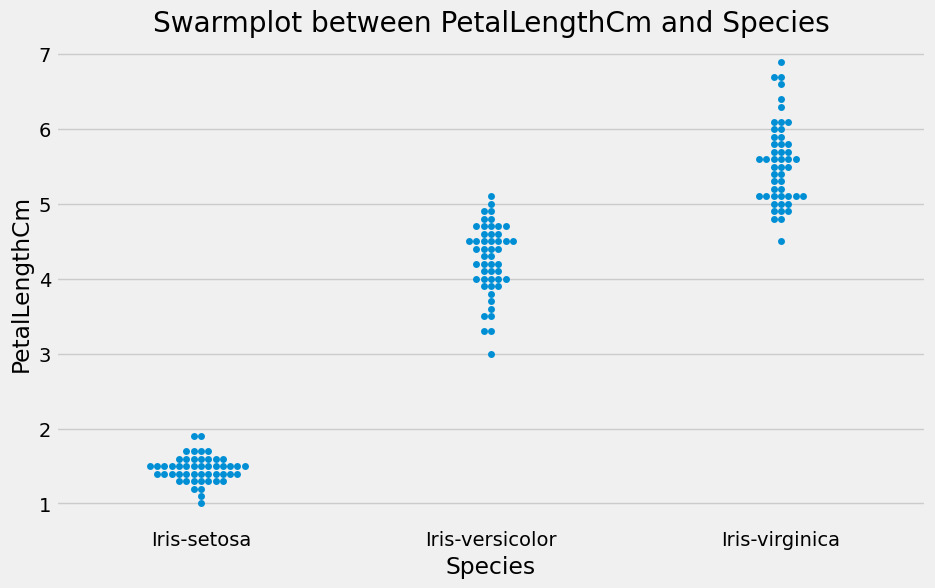

In [18]:
#create the swarm plot
plt.figure(figsize = (10, 6))
sns.swarmplot(x = 'Species', y = 'PetalLengthCm', data = df)

#add title and labels
plt.title('Swarmplot between PetalLengthCm and Species')
plt.xlabel('Species')
plt.ylabel('PetalLengthCm')

Text(38.45833333333333, 0.5, 'PetalWidthCm')

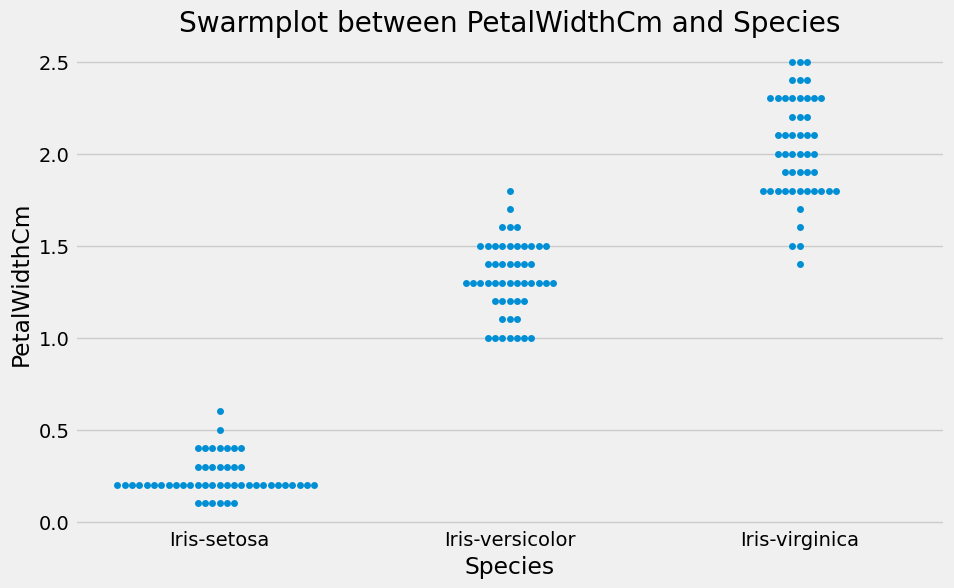

In [19]:
#create the swarm plot
plt.figure(figsize = (10, 6))
sns.swarmplot(x = 'Species', y = 'PetalWidthCm', data = df)

#add title and labels
plt.title('Swarmplot between PetalWidthCm and Species')
plt.xlabel('Species')
plt.ylabel('PetalWidthCm')

Text(0, 0.5, 'SepalLengthCm')

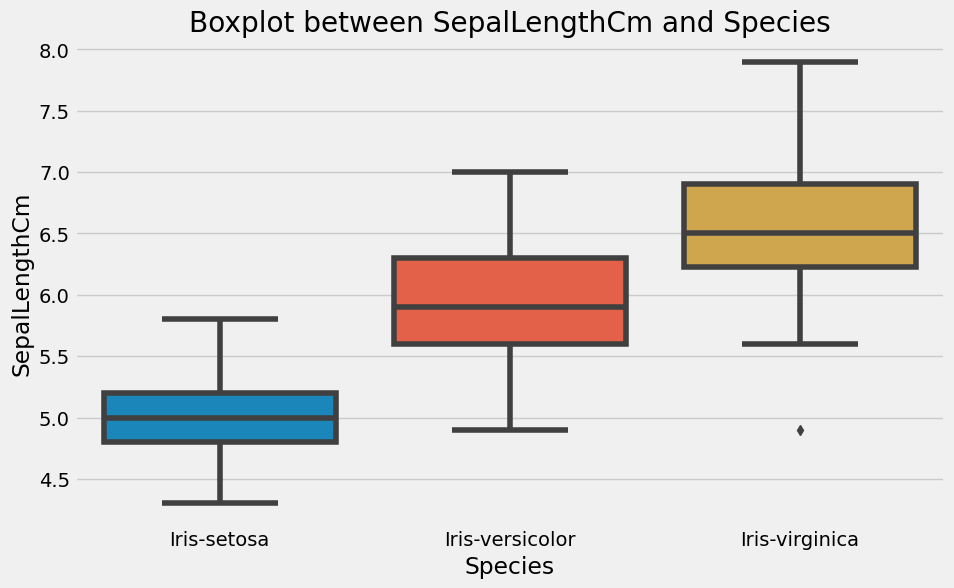

In [20]:
#create the box plot
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = df)

#add title and labels
plt.title('Boxplot between SepalLengthCm and Species')
plt.xlabel('Species')
plt.ylabel('SepalLengthCm')

Text(0, 0.5, 'SepalWidthCm')

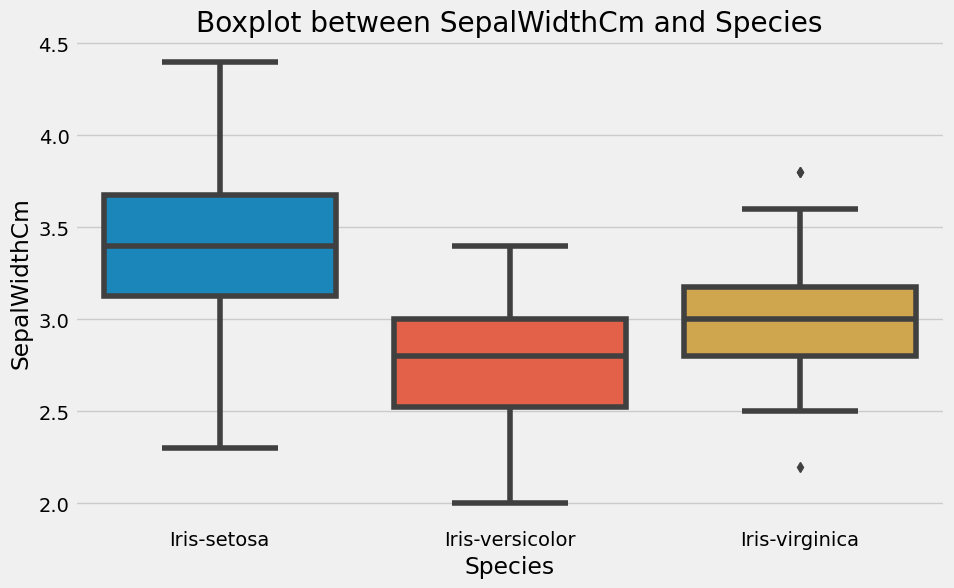

In [21]:
#create the box plot
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = df)

#add title and labels
plt.title('Boxplot between SepalWidthCm and Species')
plt.xlabel('Species')
plt.ylabel('SepalWidthCm')

Text(0, 0.5, 'PetalLengthCm')

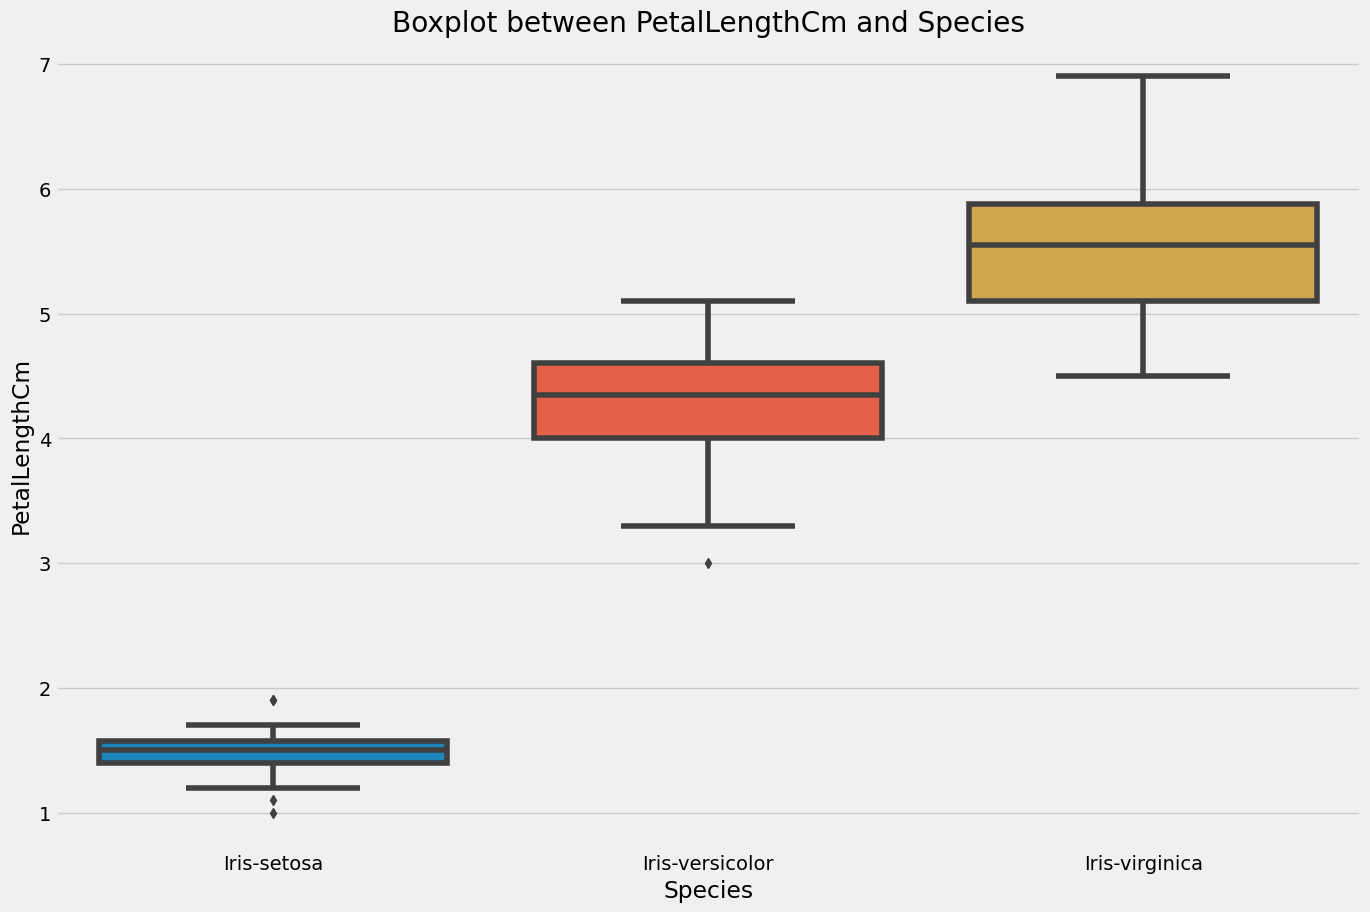

In [22]:
#create the box plot
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = df)

#add title and labels
plt.title('Boxplot between PetalLengthCm and Species')
plt.xlabel('Species')
plt.ylabel('PetalLengthCm')

Text(0, 0.5, 'PetalWidthCm')

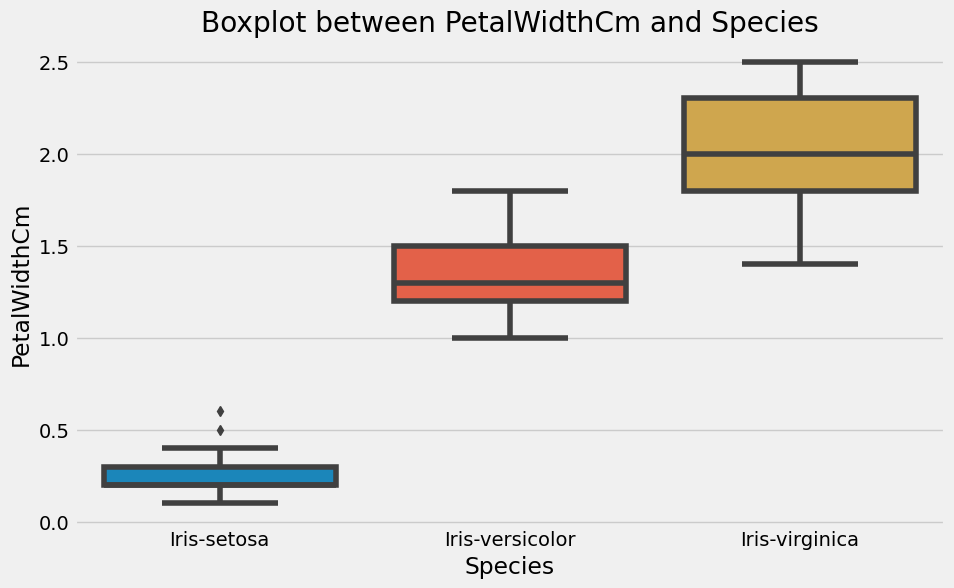

In [23]:
#create the box plot
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = df)

#add title and labels
plt.title('Boxplot between PetalWidthCm and Species')
plt.xlabel('Species')
plt.ylabel('PetalWidthCm')

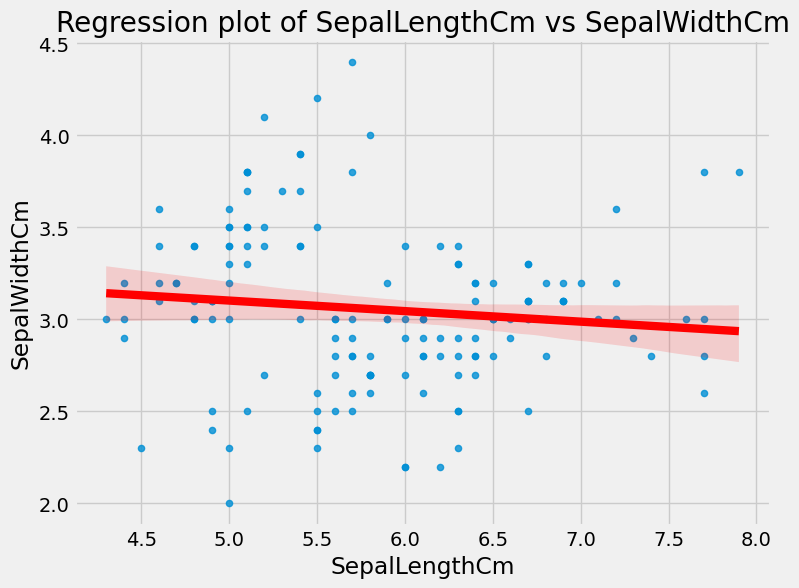

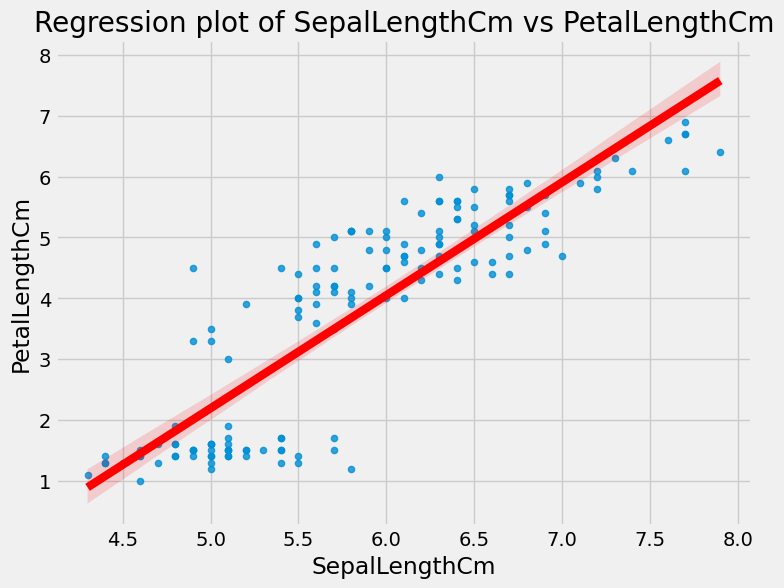

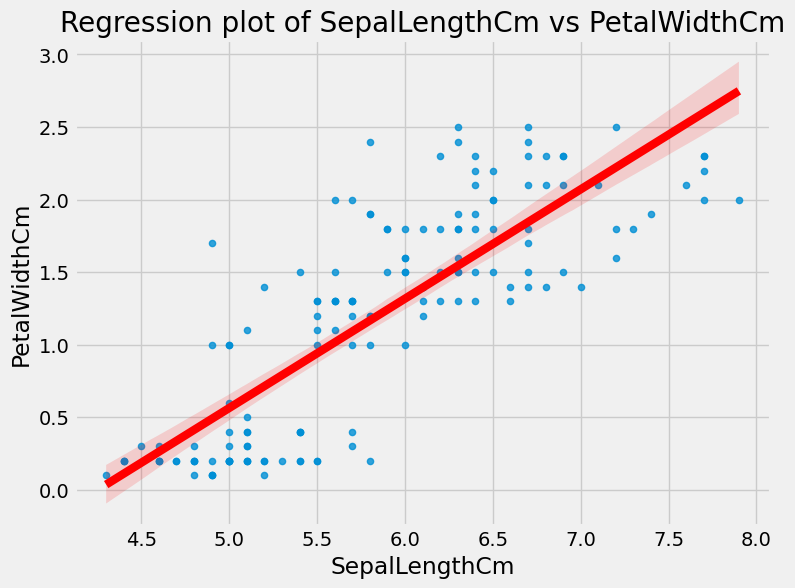

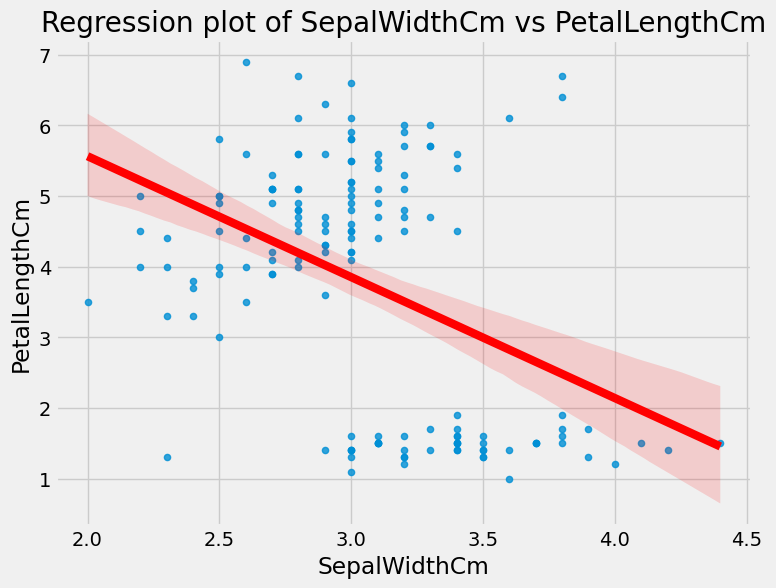

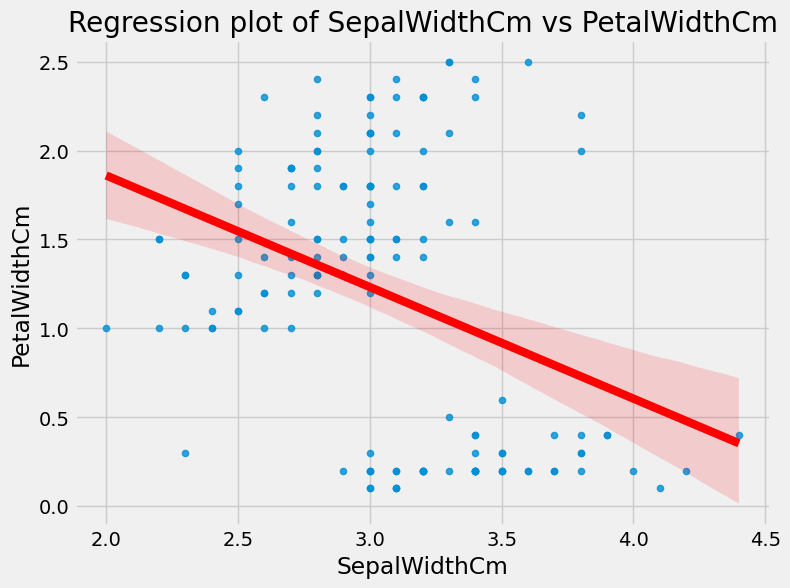

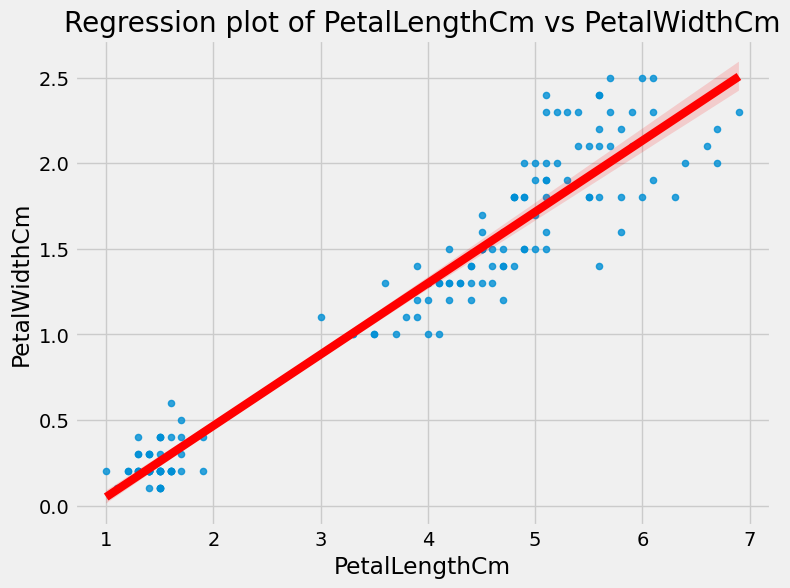

In [24]:
#define the feature pairs for regplot
feature_pairs = [
    ('SepalLengthCm', 'SepalWidthCm'),
    ('SepalLengthCm', 'PetalLengthCm'),
    ('SepalLengthCm', 'PetalWidthCm'),
    ('SepalWidthCm', 'PetalLengthCm'),
    ('SepalWidthCm', 'PetalWidthCm'),
    ('PetalLengthCm', 'PetalWidthCm')
]

#plot regplots for each pair of features
for (x, y) in feature_pairs:
    plt.figure(figsize = (8, 6))
    sns.regplot(x = x, y = y, data = df, scatter_kws={'s' : 20}, line_kws = {'color' : 'red'})
    plt.title(f'Regression plot of {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

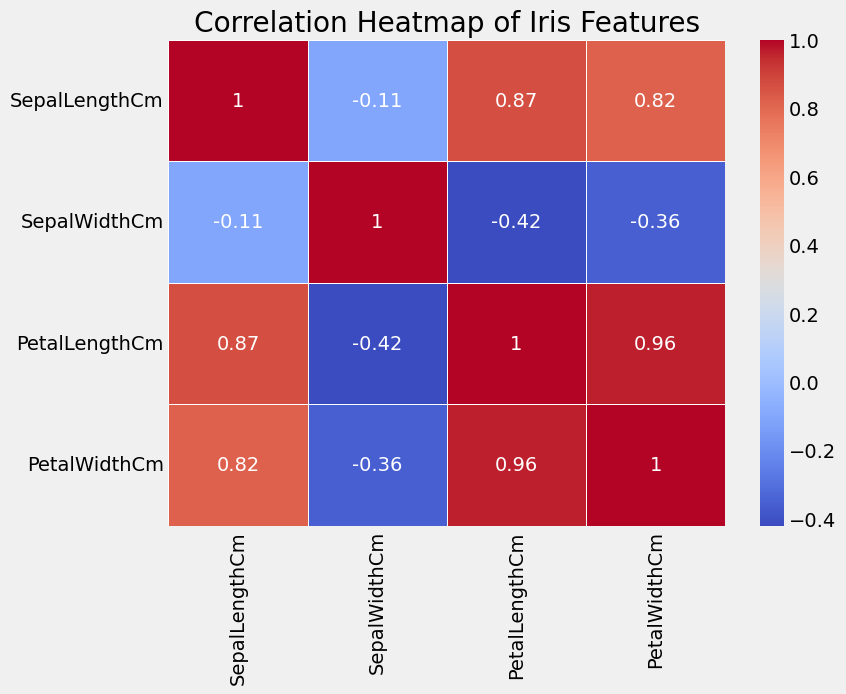

In [25]:
#compute the correlation matrix
corr_matrix = df.drop(columns = 'Species').corr()

#create a heatmap of the correlation matrix
plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Heatmap of Iris Features')
plt.show()

# Data Pre-Processing

In [26]:
#removing duplicates
df.drop_duplicates(inplace = True)

In [27]:
df.duplicated().sum()

0

In [28]:
#features of the dataset
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

#scale features using Min-Max scaler
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

In [29]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica


In [30]:
#encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [31]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


# Modelling

In [32]:
#split data into features and target
X = df.drop(columns=['Species'])
y = df['Species']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

#define hyperparameter grids for each model
param_grids = {
    'Decision Tree': {'max_depth': [3, 5, 7, None]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, None]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
}

#instantiate classification models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

#fit models using GridSearchCV for hyperparameter tuning
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv = 5, scoring = 'f1')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{name} Classification Report:\n{report}\nBest Parameters: {grid_search.best_params_}\n')

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.82      0.90      0.86        10
           2       0.88      0.78      0.82         9

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30

Best Parameters: {'max_depth': 3}

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Best Parameters: {'max_depth': 3, 'n_estimators': 50}

K-Nearest Neighbors Classification Report:
              precision    reca